In [60]:
%matplotlib inline

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import filterwarnings

filterwarnings('ignore')

In [61]:
# First we'll retrieve all the relevant csv files from the directory.
# Than we'll create a list of dataframes (one for each file) and concatenate
# them together in order to work on all the data at once.

data_files = os.listdir('csse_covid_19_data/csse_covid_19_daily_reports')
data_files = pd.Series(data_files, name='Data')
data_files = data_files[data_files.str.contains('.csv')]
data_files = data_files.sort_values()
data_files.head()

33    01-22-2020.csv
34    01-23-2020.csv
44    01-24-2020.csv
43    01-25-2020.csv
23    01-26-2020.csv
Name: Data, dtype: object

In [62]:
df_all = [pd.read_csv(f'csse_covid_19_data/csse_covid_19_daily_reports/{csv_file}') for csv_file in data_files]
len(df_all)

52

In [63]:
df = pd.concat(df_all)
df.reset_index(drop=True, inplace=True)
df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5378,NaN,Afghanistan,2020-03-11T20:00:00,7.0,0.0,0.0,33.0000,65.0000
5379,NaN,Monaco,2020-03-11T20:00:00,2.0,0.0,0.0,43.7333,7.4167
5380,NaN,Liechtenstein,2020-03-11T20:00:00,1.0,0.0,0.0,47.1400,9.5500
5381,NaN,Guyana,2020-03-11T20:00:00,1.0,1.0,0.0,5.0000,-58.7500


In [64]:
df['Last Update'] = pd.to_datetime(df['Last Update'])

df['Date Last Updated'] = df['Last Update'].dt.date
df['Time Last Updated'] = df['Last Update'].dt.time

df = df[['Province/State', 'Country/Region', 'Date Last Updated', 'Time Last Updated' ,'Confirmed', 'Deaths', 'Recovered', 'Latitude', 'Longitude']]
df

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Anhui,Mainland China,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
1,Beijing,Mainland China,2020-01-22,17:00:00,14.0,NaN,NaN,NaN,NaN
2,Chongqing,Mainland China,2020-01-22,17:00:00,6.0,NaN,NaN,NaN,NaN
3,Fujian,Mainland China,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
4,Gansu,Mainland China,2020-01-22,17:00:00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5378,NaN,Afghanistan,2020-03-11,20:00:00,7.0,0.0,0.0,33.0000,65.0000
5379,NaN,Monaco,2020-03-11,20:00:00,2.0,0.0,0.0,43.7333,7.4167
5380,NaN,Liechtenstein,2020-03-11,20:00:00,1.0,0.0,0.0,47.1400,9.5500
5381,NaN,Guyana,2020-03-11,20:00:00,1.0,1.0,0.0,5.0000,-58.7500


In [65]:
df.isnull().sum()

Province/State       2041
Country/Region          0
Date Last Updated       0
Time Last Updated       0
Confirmed              19
Deaths                441
Recovered             388
Latitude             2818
Longitude            2818
dtype: int64

In [66]:
world_wide = df.groupby('Date Last Updated').sum().copy()
world_wide.drop(columns=['Latitude', 'Longitude'], inplace=True)
# world_wide.reset_index(inplace=True)
world_wide.head()

,Confirmed,Deaths,Recovered
Date Last Updated,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [67]:
world_wide.isnull().sum()

Confirmed    0
Deaths       0
Recovered    0
dtype: int64

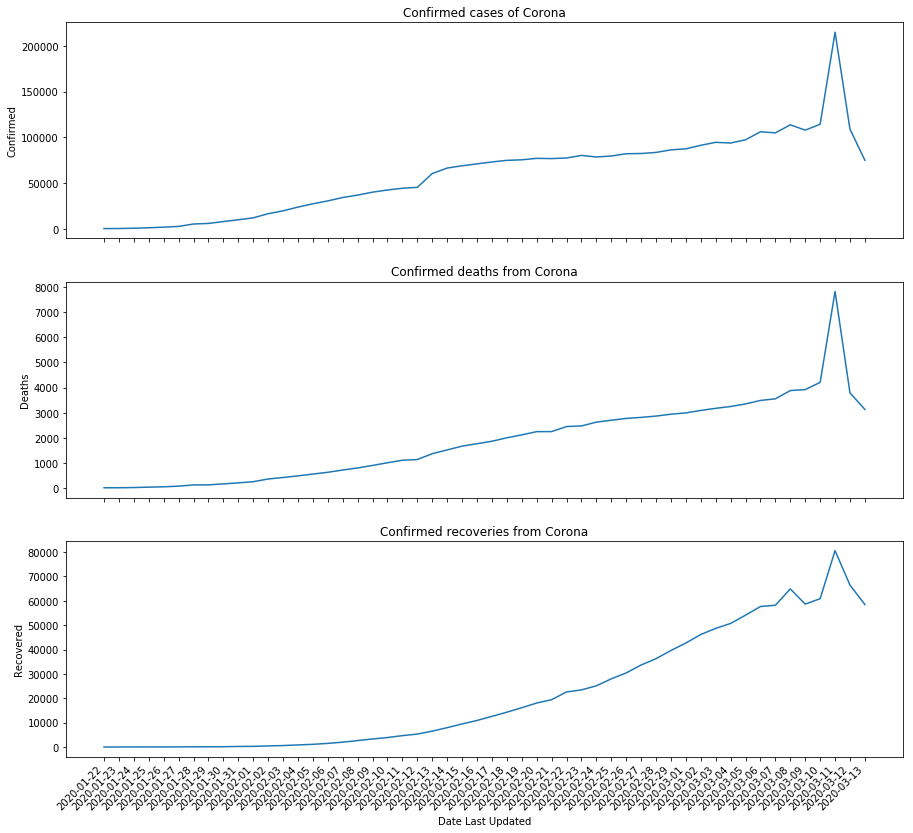

In [68]:
fig, axes = plt.subplots(3,1, figsize=(15,15))
fig.autofmt_xdate(rotation=45)

sns.lineplot(x=world_wide.index, y='Confirmed', data=world_wide, ax=axes[0])
axes[0].xaxis.set_ticks(world_wide.index)
axes[0].set_title('Confirmed cases of Corona')

sns.lineplot(x=world_wide.index, y='Deaths', data=world_wide, ax=axes[1])
axes[1].xaxis.set_ticks(world_wide.index)
axes[1].set_title('Confirmed deaths from Corona')

sns.lineplot(x=world_wide.index, y='Recovered', data=world_wide, ax=axes[2])
axes[2].xaxis.set_ticks(world_wide.index);
axes[2].set_title('Confirmed recoveries from Corona');

## Track the growth by country

In [69]:
country_counts = df['Country/Region'].value_counts().to_dict()

for country in sorted(country_counts.keys()):
    print(country, country_counts[country])

 Azerbaijan 1
Afghanistan 19
Albania 5
Algeria 18
Andorra 12
Antigua and Barbuda 1
Argentina 11
Armenia 13
Aruba 1
Australia 242
Austria 18
Azerbaijan 13
Bahrain 19
Bangladesh 6
Belarus 15
Belgium 39
Bhutan 8
Bolivia 3
Bosnia and Herzegovina 9
Brazil 18
Brunei 5
Bulgaria 6
Burkina Faso 4
Cambodia 47
Cameroon 8
Canada 159
Cayman Islands 1
Channel Islands 1
Chile 11
China 99
Colombia 9
Congo (Kinshasa) 3
Costa Rica 8
Cote d'Ivoire 3
Croatia 18
Cruise Ship 3
Cuba 2
Cyprus 5
Czech Republic 10
Czechia 3
Denmark 19
Dominican Republic 13
Ecuador 13
Egypt 29
Estonia 16
Ethiopia 1
Faroe Islands 7
Finland 45
France 57
French Guiana 7
Georgia 17
Germany 46
Gibraltar 7
Greece 17
Guadeloupe 1
Guinea 1
Guyana 2
Holy See 4
Honduras 3
Hong Kong 48
Hong Kong SAR 1
Hungary 10
Iceland 15
India 44
Indonesia 12
Iran 23
Iran (Islamic Republic of) 1
Iraq 20
Ireland 14
Israel 22
Italy 43
Ivory Coast 1
Jamaica 3
Japan 52
Jordan 11
Kazakhstan 1
Kenya 1
Korea, South 3
Kuwait 19
Latvia 12
Lebanon 22
Liechtenstein

In [70]:
US = df[df['Country/Region']  == 'US']
US

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude
31,Washington,US,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN
69,Washington,US,2020-01-23,17:00:00,1.0,NaN,NaN,NaN,NaN
117,Washington,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN
118,Chicago,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN
158,Washington,US,2020-01-25,17:00:00,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
5370,Virginia,US,2020-03-11,20:00:00,30.0,0.0,0.0,37.769337,-78.169968
5371,Washington,US,2020-03-11,20:00:00,568.0,37.0,1.0,47.400902,-121.490494
5372,West Virginia,US,2020-03-11,20:00:00,0.0,0.0,0.0,38.491226,-80.954453
5373,Wisconsin,US,2020-03-11,20:00:00,19.0,0.0,1.0,44.268543,-89.616508


In [71]:
US = gpd.GeoDataFrame(US, geometry=gpd.points_from_xy(US['Longitude'], US['Latitude']))
US.crs = {'init' :'epsg:4326'}
US

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude,geometry
31,Washington,US,2020-01-22,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
69,Washington,US,2020-01-23,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
117,Washington,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
118,Chicago,US,2020-01-24,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
158,Washington,US,2020-01-25,17:00:00,1.0,NaN,NaN,NaN,NaN,POINT (nan nan)
...,...,...,...,...,...,...,...,...,...,...
5370,Virginia,US,2020-03-11,20:00:00,30.0,0.0,0.0,37.769337,-78.169968,POINT (-78.170 37.769)
5371,Washington,US,2020-03-11,20:00:00,568.0,37.0,1.0,47.400902,-121.490494,POINT (-121.490 47.401)
5372,West Virginia,US,2020-03-11,20:00:00,0.0,0.0,0.0,38.491226,-80.954453,POINT (-80.954 38.491)
5373,Wisconsin,US,2020-03-11,20:00:00,19.0,0.0,1.0,44.268543,-89.616508,POINT (-89.617 44.269)


In [98]:
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
us_states = gpd.read_file('US_map.json')
us_states.tail()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
47,0400000US53,53,Washington,,66455.521,"MULTIPOLYGON (((-122.51954 48.28831, -122.5227..."
48,0400000US54,54,West Virginia,,24038.210,"POLYGON ((-80.07595 39.72135, -79.91617 39.720..."
49,0400000US55,55,Wisconsin,,54157.805,"MULTIPOLYGON (((-90.40331 47.02669, -90.40332 ..."
50,0400000US56,56,Wyoming,,97093.141,"POLYGON ((-110.04848 40.99755, -110.12164 40.9..."
51,0400000US72,72,Puerto Rico,,3423.775,"MULTIPOLYGON (((-65.32770 18.29584, -65.33745 ..."


In [99]:
us_states = us_states[us_states['NAME'].isin(['Puerto Rico']) == False]
us_states.tail()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
46,0400000US51,51,Virginia,,39490.086,"MULTIPOLYGON (((-75.97361 37.83582, -75.97171 ..."
47,0400000US53,53,Washington,,66455.521,"MULTIPOLYGON (((-122.51954 48.28831, -122.5227..."
48,0400000US54,54,West Virginia,,24038.210,"POLYGON ((-80.07595 39.72135, -79.91617 39.720..."
49,0400000US55,55,Wisconsin,,54157.805,"MULTIPOLYGON (((-90.40331 47.02669, -90.40332 ..."
50,0400000US56,56,Wyoming,,97093.141,"POLYGON ((-110.04848 40.99755, -110.12164 40.9..."


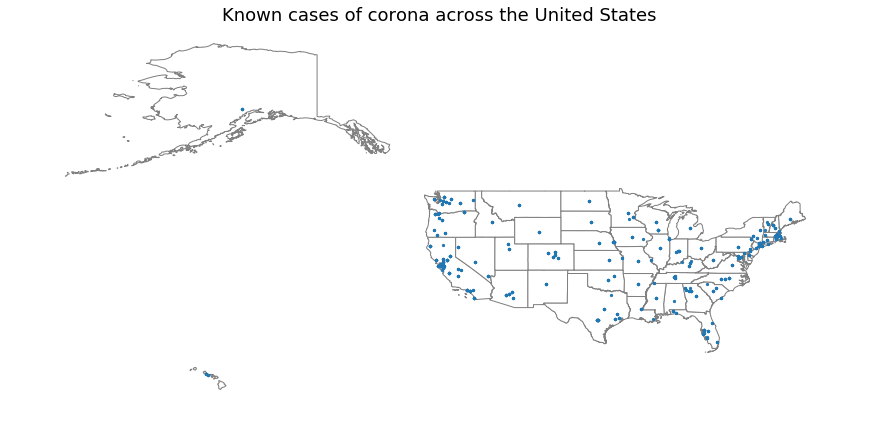

In [123]:
ax = us_states.plot(figsize=(20,7), color='white', edgecolor='gray')
ax.set_xlim([-185, -60])
ax.set_title('Known cases of corona across the United States', fontsize=18)
ax.set_axis_off()
US.plot(ax=ax, markersize=5)
plt.show()

In [132]:
US = US.groupby('Province/State')

us_groups = pd.Series(sorted(US.groups.keys()), name='US groups')
us_groups.head()

0     Norfolk County, MA
1                Alabama
2     Alameda County, CA
3                 Alaska
4                Arizona
Name: US groups, dtype: object

In [148]:
# We now can look at all the dataframes pertaining to California
california_groups = us_groups[us_groups.str.contains('(CA|California)')]
california_groups

2                      Alameda County, CA
9                            Berkeley, CA
13                             California
27                Contra Costa County, CA
46                      Fresno County, CA
61                    Humboldt County, CA
81                        Los Angeles, CA
83                      Madera County, CA
118                     Orange County, CA
119                            Orange, CA
124                     Placer County, CA
133                  Riverside County, CA
136                 Sacramento County, CA
138                        San Benito, CA
139                  San Diego County, CA
140              San Francisco County, CA
141                         San Mateo, CA
142                Santa Clara County, CA
143                       Santa Clara, CA
144                 Santa Cruz County, CA
149                     Shasta County, CA
152                     Sonoma County, CA
164                            Travis, CA
165    Travis, CA (From Diamond Pr

In [146]:
california = [US.get_group(group) for group in california_groups]
california = pd.concat(california)
california

,Province/State,Country/Region,Date Last Updated,Time Last Updated,Confirmed,Deaths,Recovered,Latitude,Longitude
3904,"Alameda County, CA",US,2020-03-07,13:13:14,2.0,0.0,0.0,37.6017,-121.7195
4149,"Alameda County, CA",US,2020-03-07,13:13:14,2.0,0.0,0.0,37.6017,-121.7195
4413,"Alameda County, CA",US,2020-03-07,13:13:14,2.0,0.0,0.0,37.6017,-121.7195
3214,"Berkeley, CA",US,2020-03-03,23:53:03,1.0,0.0,0.0,37.8715,-122.2730
3377,"Berkeley, CA",US,2020-03-03,23:53:03,1.0,0.0,0.0,37.8715,-122.2730
...,...,...,...,...,...,...,...,...,...
4512,"Travis, CA (From Diamond Princess)",US,2020-02-24,23:33:02,0.0,0.0,0.0,38.2721,-121.9399
3759,"Yolo County, CA",US,2020-03-06,20:13:14,1.0,0.0,0.0,38.7646,-121.9018
3983,"Yolo County, CA",US,2020-03-06,20:13:14,1.0,0.0,0.0,38.7646,-121.9018
4238,"Yolo County, CA",US,2020-03-06,20:13:14,1.0,0.0,0.0,38.7646,-121.9018
